# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
#Type your code here
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.stats import gaussian_kde
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head(5)

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

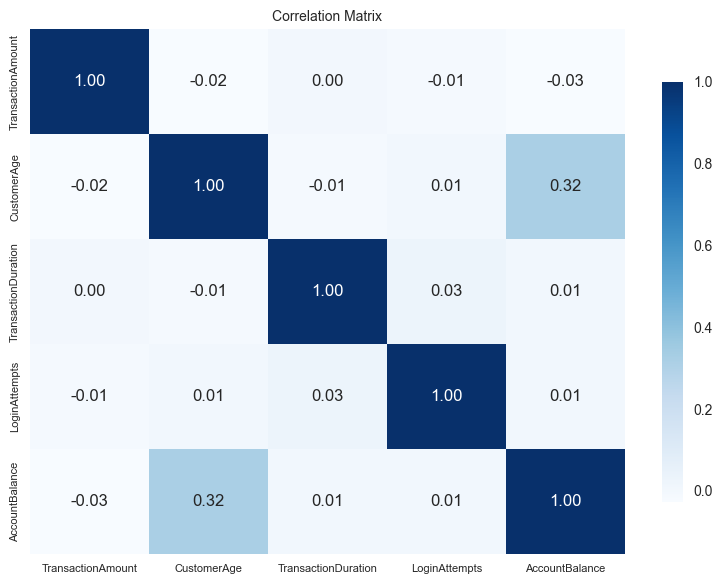

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="Blues",
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Matrix", fontsize=10, loc='center')
plt.xticks(rotation=0, fontsize=8)
plt.yticks(rotation=90, fontsize=8)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

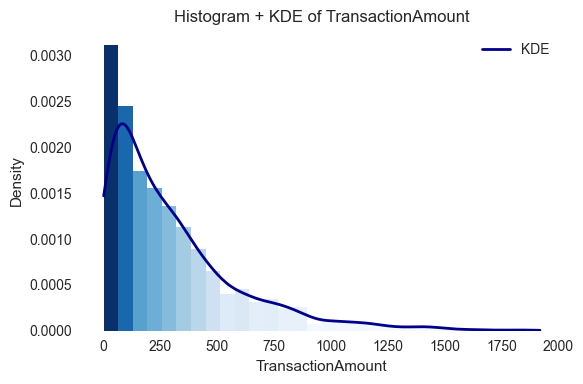

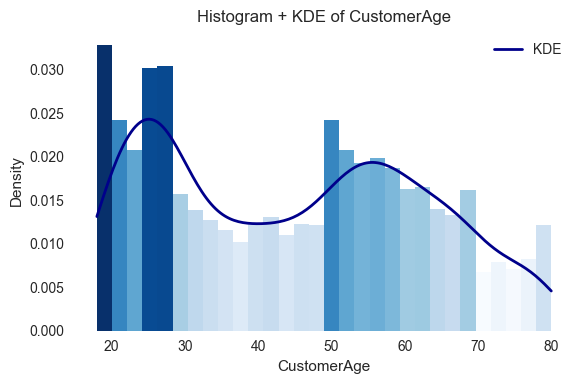

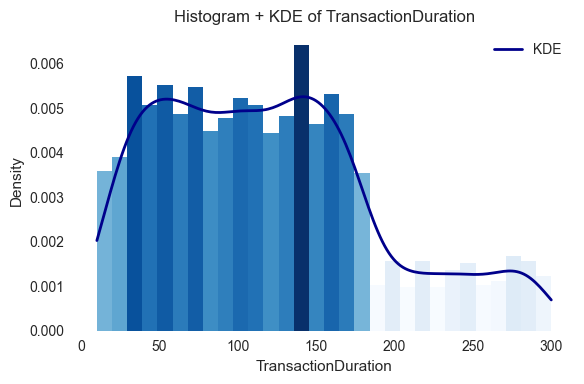

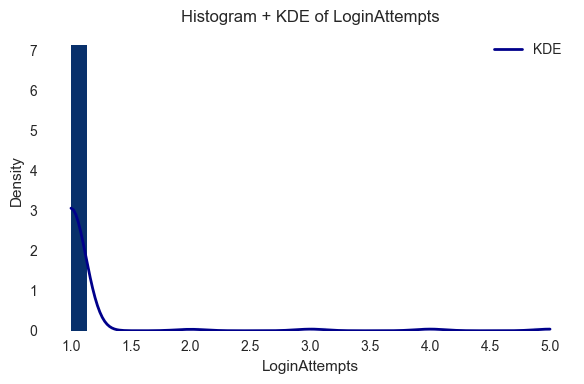

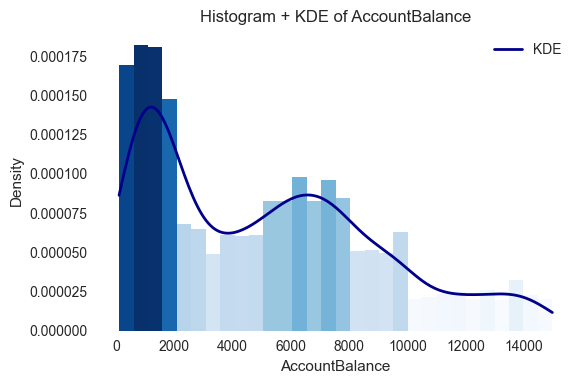

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))

    # Histogram
    n, bins, patches = plt.hist(df[col].dropna(), bins=30, density=True, edgecolor='none')

    # Pewarnaan histogram
    norm = plt.Normalize(n.min(), n.max())
    for count, patch in zip(n, patches):
        color = plt.cm.Blues(norm(count))
        patch.set_facecolor(color)

    # KDE line (biru gelap)
    data = df[col].dropna().values
    kde = gaussian_kde(data)
    x_vals = np.linspace(data.min(), data.max(), 200)
    plt.plot(x_vals, kde(x_vals), color="darkblue", linewidth=2, label="KDE")

    # Styling
    plt.title(f"Histogram + KDE of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(False)

    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.tight_layout()
    plt.show()


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

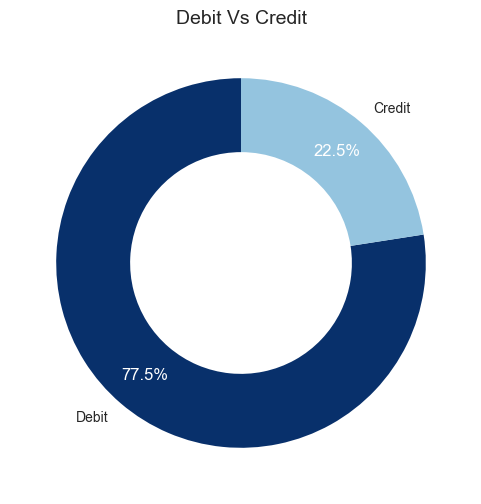

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
transaction_counts = df["TransactionType"].value_counts()

norm = plt.Normalize(transaction_counts.min(), transaction_counts.max())
colors = [plt.cm.Blues(0.4 + 0.6 * norm(count)) for count in transaction_counts]

plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    transaction_counts, 
    labels=transaction_counts.index, 
    autopct="%1.1f%%", 
    startangle=90,
    wedgeprops=dict(width=0.4),
    colors=colors,
    pctdistance=0.8,
)

plt.setp(autotexts, size=12, color="white")
plt.title("Debit Vs Credit", fontsize=14)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
PreviousTransactionDate    28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
TransactionDate            24
dtype: int64

In [10]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

21

In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScaler() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
numeric_features = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]

df_scaled = df.copy()

scaler = MinMaxScaler()
df_scaled[numeric_features] = scaler.fit_transform(df_scaled[numeric_features])

df_scaled.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 8:06:39


In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df_drop = df_scaled.copy()

cols_to_drop = ["TransactionID", "AccountID", "DeviceID", "MerchantID", "IP Address"]
df_drop = df_drop.drop(columns=cols_to_drop)

df_drop.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 8:06:39


In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
df_encoded = df_drop.copy()
categorical_features = ["TransactionType", "Location", "Channel", "CustomerOccupation"]

encoders_cat = {}

for col in categorical_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    encoders_cat[col] = le

df_encoded.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,0.006874,2023-10-16 17:51:24,0,1,2,NaN,3,0.648276,0.0,0.492591,2024-11-04 8:06:39


In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df_encoded.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df_clean = df_encoded.copy()

for col in df_clean.columns:
    if df_clean[col].dtype in ["float64", "int64"]:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mean())
    else:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

df_clean.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,0.006874,2023-10-16 17:51:24,0,1,2,0.430297,3,0.648276,0.0,0.492591,2024-11-04 8:06:39


In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_final = df_clean.copy()
df_final = df_final.drop_duplicates()
df_final.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,0.006874,2023-10-16 17:51:24,0,1,2,0.430297,3,0.648276,0.0,0.492591,2024-11-04 8:06:39


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
df_outlier = df_final.copy()

numeric_cols = df_outlier.select_dtypes(include=[np.number]).columns

Q1 = df_outlier[numeric_cols].quantile(0.25)
Q3 = df_outlier[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

mask = ~((df_outlier[numeric_cols] < (Q1 - 1.5 * IQR)) | 
         (df_outlier[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

df_no_outlier = df_outlier[mask]

df_no_outlier.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 8:09:06
5,0.047888,2023-04-03 17:15:01,1,28,0,0.000000,3,0.558621,0.0,0.045738,2024-11-04 8:06:36


In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
df_binning = df_no_outlier.copy()

df_binning["AgeGroup"] = pd.cut(
    df_binning["CustomerAge"],
    bins=[0, 0.33, 0.66, 1],
    labels=["Young", "Adult", "Senior"]
)

df_binning["AmountGroup"] = pd.cut(
    df_binning["TransactionAmount"],
    bins=[0, 0.33, 0.66, 1],
    labels=["Low", "Medium", "High"]
)

encoders_bin = {}

for col in ["AgeGroup", "AmountGroup"]:
    le = LabelEncoder()
    df_binning[col] = le.fit_transform(df_binning[col].astype(str))
    encoders_bin[col] = le

df_binning[["CustomerAge", "AgeGroup", "TransactionAmount", "AmountGroup"]].head()

,CustomerAge,AgeGroup,TransactionAmount,AmountGroup
0,0.838710,1,0.007207,0
1,0.806452,1,0.195940,0
2,0.016129,2,0.065680,0
3,0.129032,2,0.096016,0
5,0.000000,3,0.047888,0


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df_binning.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,AmountGroup
count,1728.000000,1728.0,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.0,1728.000000,1728.000000,1728.000000
mean,0.130580,1.0,21.284722,0.927662,0.424020,1.531829,0.375647,0.0,0.334932,1.124421,0.077546
std,0.110571,0.0,12.367419,0.841855,0.284372,1.150577,0.242531,0.0,0.256620,0.894637,0.269689
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.040273,1.0,11.000000,0.000000,0.145161,1.000000,0.179310,0.0,0.094101,0.000000,0.000000
50%,0.101402,1.0,21.000000,1.000000,0.419355,2.000000,0.355172,0.0,0.320561,1.000000,0.000000
75%,0.190014,1.0,32.000000,2.000000,0.645161,3.000000,0.524138,0.0,0.503338,2.000000,0.000000
max,0.467223,1.0,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,3.000000,2.000000


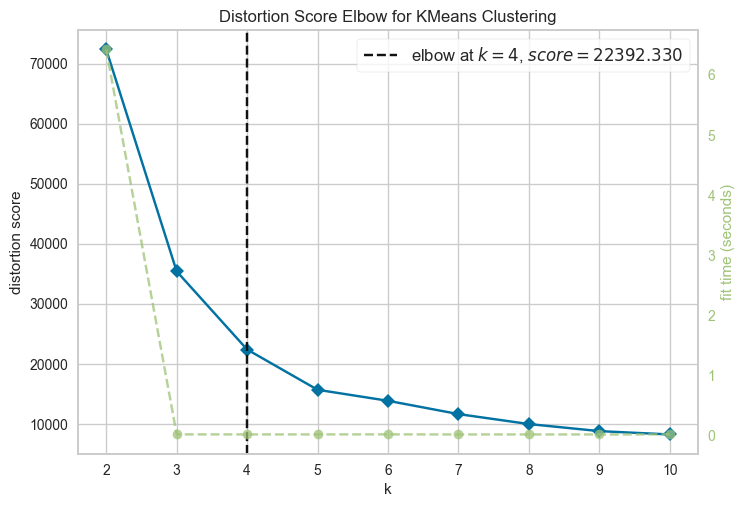

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
X = df_binning.select_dtypes(include=[np.number])

model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,11))

visualizer.fit(X)
visualizer.show()   

In [21]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

df_clustered = df_binning.copy()
df_clustered["Target"] = clusters

cluster_counts = df_clustered["Target"].value_counts().sort_index()
cluster_counts

df_clustered.head(), cluster_counts, kmeans.inertia_

(   TransactionAmount PreviousTransactionDate  TransactionType  Location  \
 0           0.007207     2023-04-11 16:29:14                1        36   
 1           0.195940     2023-06-27 16:44:19                1        15   
 2           0.065680     2023-07-10 18:16:08                1        23   
 3           0.096016     2023-05-05 16:32:11                1        33   
 5           0.047888     2023-04-03 17:15:01                1        28   
 
    Channel  CustomerAge  CustomerOccupation  TransactionDuration  \
 0        0     0.838710                   0             0.244828   
 1        0     0.806452                   0             0.451724   
 2        2     0.016129                   3             0.158621   
 3        2     0.129032                   3             0.051724   
 5        0     0.000000                   3             0.558621   
 
    LoginAttempts  AccountBalance     TransactionDate  AgeGroup  AmountGroup  \
 0            0.0        0.336832  2024-11-04 

Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.
sil_score = silhouette_score(X, clusters)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.4974416989637224


Mean of Each Cluster Profile (Real Centroid)
        TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
Target                                                                       
0                   0.133              1.0    16.023    0.928        0.425   
1                   0.133              1.0    26.849    0.869        0.426   
2                   0.127              1.0     5.292    0.956        0.438   
3                   0.130              1.0    37.783    0.961        0.407   

        CustomerOccupation  TransactionDuration  LoginAttempts  \
Target                                                           
0                    1.419                0.377            0.0   
1                    1.652                0.383            0.0   
2                    1.585                0.380            0.0   
3                    1.468                0.361            0.0   

        AccountBalance  AgeGroup  AmountGroup  
Target                                   

c:\Users\Rahfi\miniconda3\envs\env310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


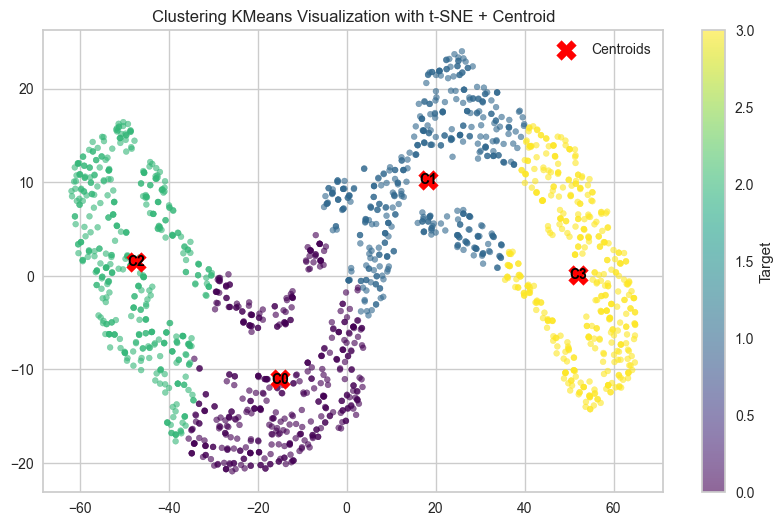

In [24]:
# Membuat visualisasi hasil clustering
cluster_profile = df_clustered.groupby("Target").mean(numeric_only=True).round(3)
print("Mean of Each Cluster Profile (Real Centroid)")
print(cluster_profile)

X_feat = df_clustered.select_dtypes(include="number").drop(columns=["Target"])
y_feat = df_clustered["Target"]

tsne = TSNE(n_components=2, random_state=42, perplexity=40, n_iter=1000)
X_embedded = tsne.fit_transform(X_feat)

tsne_df = pd.DataFrame(X_embedded, columns=["x","y"])
tsne_df["Target"] = y_feat.values
centroids_tsne = tsne_df.groupby("Target")[["x","y"]].mean()

plt.figure(figsize=(10,6))

scatter = plt.scatter(tsne_df["x"], tsne_df["y"], c=tsne_df["Target"], 
                      cmap="viridis", alpha=0.6, s=18)

plt.scatter(centroids_tsne["x"], centroids_tsne["y"], 
            c="red", marker="X", s=200, label="Centroids")
for cl, row in centroids_tsne.iterrows():
    plt.text(row["x"], row["y"], f"C{cl}", color="black", fontsize=10, 
             ha="center", va="center", weight="bold")

plt.colorbar(scatter, label="Target")
plt.title("Clustering KMeans Visualization with t-SNE + Centroid")
plt.legend()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

Explained Variance Ratio Each Component: [0.97999113 0.01062121]
Explained Variance Total PCA: 0.990612338732253
KMeans Inertia (Fit in PCA): 19162.568172778196

Silhouette Score KMeans: 0.4974
Silhouette Score KMeans + PCA (2 Components): 0.5322


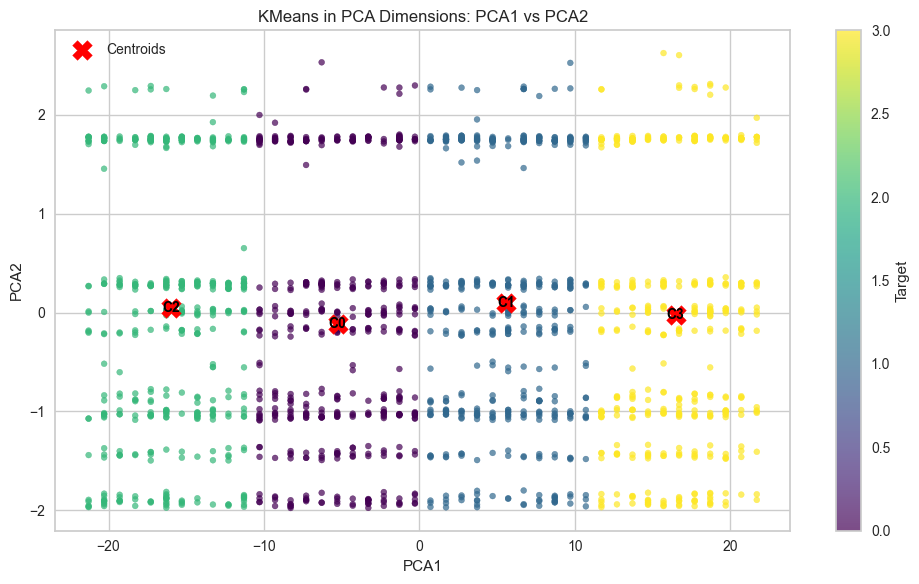

,PCA1,PCA2,Cluster
0,14.716549,-1.420737,3
1,-6.283424,-1.492795,0
2,1.715031,1.782727,1
3,11.715015,1.707644,3
5,6.716390,2.261421,1


In [25]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)

X_feat_num = df_clustered.select_dtypes(include=[np.number]).drop(columns=["Target"], errors="ignore")
n_components = 2
pca = PCA(n_components=n_components)

X_pca = pca.fit_transform(X_feat_num)

pca_cols = [f"PCA{i+1}" for i in range(n_components)]
PCA_n = pd.DataFrame(X_pca, columns=pca_cols, index=df_clustered.index)

k = 4
kmeans_raw = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_raw = kmeans_raw.fit_predict(X)

kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(PCA_n)

PCA_n["Cluster"] = labels_pca

print("Explained Variance Ratio Each Component:", pca.explained_variance_ratio_)
print("Explained Variance Total PCA:", pca.explained_variance_ratio_.sum())
print("KMeans Inertia (Fit in PCA):", kmeans_pca.inertia_)
print()

sil_raw = silhouette_score(X, labels_raw)
sil_pca = silhouette_score(PCA_n[pca_cols], labels_pca)

print(f"Silhouette Score KMeans: {sil_raw:.4f}")
print(f"Silhouette Score KMeans + PCA ({n_components} Components): {sil_pca:.4f}")

# 1) Scatter plot PCA1 vs PCA2 berwarna berdasarkan cluster + centroid
if n_components >= 2:
    centroids = kmeans_pca.cluster_centers_  # centroid di ruang PCA

    plt.figure(figsize=(10,6))
    scatter = plt.scatter(PCA_n["PCA1"], PCA_n["PCA2"],
                          c=labels_pca, cmap="viridis", s=18, alpha=0.7)
    # centroid
    plt.scatter(centroids[:, 0], centroids[:, 1],
                c="red", s=200, marker="X", label="Centroids")
    for i, (cx, cy) in enumerate(centroids):
        plt.text(cx, cy, f"C{i}", color="black", fontsize=10,
                 ha="center", va="center", weight="bold")

    plt.colorbar(scatter, label="Target")
    plt.title("KMeans in PCA Dimensions: PCA1 vs PCA2")
    plt.xlabel("PCA1")

    plt.ylabel("PCA2")
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("n_components < 2, scatter PCA1 vs PCA2 dilewati.")

PCA_n.head()

In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.

In [27]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

num_cols = df_clustered.select_dtypes(include=[np.number]).columns.drop(["Target"], errors="ignore")

def describe_cluster(cl: int):
    dfc = df_clustered[df_clustered["Target"] == cl]
    if dfc.empty:
        print(f"=== Analisis Deskriptif Cluster {cl} ===")
        print("Tidak ada data untuk cluster ini.\n")
        return
    summary = (
        dfc.groupby("Target")[num_cols]
           .agg(["mean", "min", "max"])
           .round(3)
           .T
    )
    print(f"=== Analisis Deskriptif Cluster {cl} ===")
    display(summary)

for cl in sorted(df_clustered["Target"].unique()):
    describe_cluster(cl)

=== Analisis Deskriptif Cluster 0 ===


Target                         0
TransactionAmount   mean   0.133
                    min    0.000
                    max    0.457
TransactionType     mean   1.000
                    min    1.000
                    max    1.000
Location            mean  16.023
                    min   11.000
                    max   21.000
Channel             mean   0.928
                    min    0.000
                    max    3.000
CustomerAge         mean   0.425
                    min    0.000
                    max    1.000
CustomerOccupation  mean   1.419
                    min    0.000
                    max    4.000
TransactionDuration mean   0.377
                    min    0.003
                    max    0.997
LoginAttempts       mean   0.000
                    min    0.000
                    max    0.000
AccountBalance      mean   0.349
                    min    0.001
                    max    0.998
AgeGroup            mean   1.083
                    min    0.000
                    max    3.000
AmountGroup         mean   0.074
                    min    0.000
                    max    1.000

=== Analisis Deskriptif Cluster 1 ===


Target                         1
TransactionAmount   mean   0.133
                    min    0.000
                    max    0.459
TransactionType     mean   1.000
                    min    1.000
                    max    1.000
Location            mean  26.849
                    min   22.000
                    max   32.000
Channel             mean   0.869
                    min    0.000
                    max    3.000
CustomerAge         mean   0.426
                    min    0.000
                    max    1.000
CustomerOccupation  mean   1.652
                    min    0.000
                    max    4.000
TransactionDuration mean   0.383
                    min    0.000
                    max    0.997
LoginAttempts       mean   0.000
                    min    0.000
                    max    0.000
AccountBalance      mean   0.329
                    min    0.001
                    max    0.980
AgeGroup            mean   1.117
                    min    0.000
                    max    3.000
AmountGroup         mean   0.088
                    min    0.000
                    max    2.000

=== Analisis Deskriptif Cluster 2 ===


Target                         2
TransactionAmount   mean   0.127
                    min    0.000
                    max    0.467
TransactionType     mean   1.000
                    min    1.000
                    max    1.000
Location            mean   5.292
                    min    0.000
                    max   10.000
Channel             mean   0.956
                    min    0.000
                    max    3.000
CustomerAge         mean   0.438
                    min    0.000
                    max    1.000
CustomerOccupation  mean   1.585
                    min    0.000
                    max    4.000
TransactionDuration mean   0.380
                    min    0.000
                    max    1.000
LoginAttempts       mean   0.000
                    min    0.000
                    max    0.000
AccountBalance      mean   0.325
                    min    0.002
                    max    0.969
AgeGroup            mean   1.135
                    min    0.000
                    max    3.000
AmountGroup         mean   0.072
                    min    0.000
                    max    1.000

=== Analisis Deskriptif Cluster 3 ===


Target                         3
TransactionAmount   mean   0.130
                    min    0.001
                    max    0.463
TransactionType     mean   1.000
                    min    1.000
                    max    1.000
Location            mean  37.783
                    min   33.000
                    max   43.000
Channel             mean   0.961
                    min    0.000
                    max    3.000
CustomerAge         mean   0.407
                    min    0.000
                    max    1.000
CustomerOccupation  mean   1.468
                    min    0.000
                    max    4.000
TransactionDuration mean   0.361
                    min    0.003
                    max    0.986
LoginAttempts       mean   0.000
                    min    0.000
                    max    0.000
AccountBalance      mean   0.336
                    min    0.000
                    max    1.000
AgeGroup            mean   1.166
                    min    0.000
                    max    3.000
AmountGroup         mean   0.076
                    min    0.000
                    max    1.000

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

### 1. Cluster 0 - Nasabah Saldo Tinggi & Transaksi Besar

- **Rata-rata (mean) TransactionAmount**: 0.133 -> relatif tinggi dibanding cluster lain
- **Rata-rata (mean) AccountBalance**: 0.349 -> saldo cukup tinggi
- **Rata-rata (mean) TransactionDuration**: 0.377 -> durasi transaksi moderat-tinggi
- **Rata-rata (mean) AgeGroup**: 1.083 -> usia menengah

Rentang: transaksi bisa sangat kecil (0) sampai besar (0.457), saldo juga bervariasi luas.

Analisis: Cluster ini mencerminkan kelompok nasabah dengan saldo rekening relatif tinggi dan nominal transaksi cukup besar. Mereka aktif bertransaksi dengan durasi transaksi yang moderat hingga panjang. Secara umum, nasabah dalam kelompok ini memiliki kemampuan finansial yang baik, menjaga saldo dalam jumlah besar, serta melakukan transaksi dengan nilai signifikan. Hal ini menunjukkan bahwa mereka adalah calon kuat untuk menjadi nasabah prioritas. Mereka cenderung membutuhkan layanan dengan kualitas tinggi dan kecepatan transaksi yang andal.

Rekomendasi: Tawarkan produk tabungan premium, investasi, dan layanan prioritas.

---

### 2. Cluster 1 - Nasabah Transaksi Aktif & Saldo Menengah

- **Rata-rata (mean) TransactionAmount**: 0.133 -> cukup tinggi, mirip Cluster 0
- **Rata-rata (mean) AccountBalance**: 0.329 -> saldo menengah
- **Rata-rata (mean) TransactionDuration**: 0.383 -> tertinggi, artinya transaksi sering & relatif lama
- **Rata-rata (mean) AgeGroup**: 1.117 -> usia menengah ke atas

Rentang: nilai transaksi dari kecil (0) hingga menengah (0.459), saldo sangat variatif.

Analisis: Cluster ini didominasi oleh nasabah dengan aktivitas transaksi yang tinggi (frekuensi dan durasi lebih lama), walaupun saldo rata-rata mereka tidak sebesar Cluster 0. Pola ini menandakan kelompok nasabah yang sangat aktif dalam penggunaan layanan perbankan sehari-hari, baik untuk kebutuhan belanja, pembayaran rutin, maupun transaksi finansial lainnya. Dengan tingkat keterlibatan yang tinggi, mereka sangat responsif terhadap promosi berbasis reward, cashback, maupun loyalty program. Nasabah ini merupakan segmen yang penting untuk dipertahankan dengan strategi engagement yang konsisten.

Rekomendasi: Tawarkan produk digital banking, cashback transaksi, loyalty rewards.

---

### 3. Cluster 2 – Nasabah Senior & Saldo Rendah

- **Rata-rata (mean) CustomerAge**: 0.438 -> tertinggi (nasabah lebih tua)
- **Rata-rata (mean) AccountBalance**: 0.325 -> saldo relatif rendah
- **Rata-rata (mean) TransactionAmount**: 0.127 -> nominal transaksi kecil
- **Rata-rata (mean) TransactionDuration**: 0.380 -> cukup tinggi
- **Rata-rata (mean) AgeGroup**: 1.135 -> dominan usia lebih tua

Rentang: saldo bisa sangat kecil (0.002), transaksi umumnya kecil-menengah (max 0.467).

Analisis: Cluster ini terdiri dari nasabah dengan usia relatif lebih tua, tetapi dengan saldo rekening dan nominal transaksi yang relatif kecil. Mereka cenderung lebih konservatif, jarang melakukan transaksi bernilai besar, dan fokus pada kestabilan dibandingkan pada pertumbuhan saldo aktif. Segmentasi ini penting karena walaupun kontribusi transaksi mereka tidak besar, mereka membutuhkan layanan perbankan yang aman, sederhana, dan dapat diandalkan. Nasabah di cluster ini lebih cocok untuk ditawarkan produk dengan resiko rendah seperti deposito, tabungan stabil, atau layanan pensiun.

Rekomendasi: Tawarkan produk deposito, asuransi, layanan pensiun.

---

### 4. Cluster 3 – Nasabah Muda & Saldo Sedang

- **Rata-rata (mean) CustomerAge**: 0.407 -> termuda dibanding cluster lain
- **Rata-rata (mean) AccountBalance**: 0.336 -> saldo menengah
- **Rata-rata (mean) TransactionAmount**: 0.130 -> nominal transaksi kecil-menengah
- **Rata-rata (mean) TransactionDuration**: 0.361 -> relatif pendek
- **Rata-rata (mean) AgeGroup**: 1.166 -> usia cenderung lebih muda

Rentang: saldo lebih stabil (0.003 – 1.0), nominal transaksi moderat (max 0.463).

Analisis: Cluster ini berisi nasabah dengan usia lebih muda dan saldo menengah, serta aktivitas transaksi yang cenderung standar. Kelompok ini menarik karena memiliki potensi jangka panjang: mereka sudah aktif dalam sistem perbankan, memiliki saldo cukup untuk berkembang, dan masih dalam tahap awal membangun stabilitas keuangan. Meskipun nominal transaksi mereka tidak besar, kelompok ini merupakan segmen yang potensial untuk diarahkan ke produk tabungan jangka panjang, investasi pemula, dan layanan digital modern. Dengan edukasi finansial dan promosi yang tepat, nasabah di cluster ini bisa ditingkatkan menjadi pengguna produk bernilai lebih tinggi.

Rekomendasi: Edukasi investasi jangka panjang, produk tabungan mahasiswa, promo digital.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [28]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
clustering = df_clustered.columns.tolist()
clustering

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate',
 'AgeGroup',
 'AmountGroup',
 'Target']

In [29]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df_clustered.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()
df_clustered[numeric_features] = scaler.inverse_transform(df_clustered[numeric_features])
df_clustered.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,AgeGroup,AmountGroup,Target
0,14.09,2023-04-11 16:29:14,1,36,0,70.0,0,81.0,1.0,5112.21,2024-11-04 8:08:08,1,0,3
1,376.24,2023-06-27 16:44:19,1,15,0,68.0,0,141.0,1.0,13758.91,2024-11-04 8:09:35,1,0,0
2,126.29,2023-07-10 18:16:08,1,23,2,19.0,3,56.0,1.0,1122.35,2024-11-04 8:07:04,2,0,1
3,184.50,2023-05-05 16:32:11,1,33,2,26.0,3,25.0,1.0,8569.06,2024-11-04 8:09:06,2,0,3
5,92.15,2023-04-03 17:15:01,1,28,0,18.0,3,172.0,1.0,781.68,2024-11-04 8:06:36,3,0,1


In [31]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()
# Inverse dataset yang sudah diencode ke kategori aslinya
# Pastikan kamu sudah punya dictionary encoders dari tahap encoding awal
df_inverse = df_clustered.copy()

categorical_features = ["TransactionType", "Location", "Channel", "CustomerOccupation"]
binning_features     = ["AgeGroup", "AmountGroup"]

# Inverse kategori asli
for col in categorical_features:
    if col in df_inverse.columns and col in encoders_cat:
        ser = df_inverse[col]
        if ser.dtype.kind == "f":  # float → mungkin ada NaN
            ser = ser.round().astype("Int64")
            na = ser.isna()
            tmp = encoders_cat[col].inverse_transform(ser.fillna(0).astype(int))
            ser = pd.Series(tmp, index=ser.index)
            ser[na] = pd.NA
            df_inverse[col] = ser
        else:
            df_inverse[col] = encoders_cat[col].inverse_transform(ser.astype(int))

# Inverse hasil binning
for col in binning_features:
    if col in df_inverse.columns and col in encoders_bin:
        df_inverse[col] = encoders_bin[col].inverse_transform(df_inverse[col].round().astype(int))


df_inverse.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,AgeGroup,AmountGroup,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08,Senior,Low,3
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35,Senior,Low,0
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04,Young,Low,1
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06,Young,Low,3
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 8:06:36,nan,Low,1


In [32]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
numeric_cols = [c for c in df_inverse.select_dtypes(include=[float, int]).columns if c != "Target"]
categorical_cols = [c for c in df_inverse.select_dtypes(include=["object", "string", "category"]).columns]

def first_mode(s: pd.Series):
    m = s.mode(dropna=True)
    return m.iloc[0] if len(m) else pd.NA

def describe_cluster(target_val: int):
    dfc = df_inverse[df_inverse["Target"] == target_val]
    print(f"\nCluster {target_val}")
    if dfc.empty:
        print("No Data for This Cluster.")
        return

    if numeric_cols:
        num_agg = (
            dfc.groupby("Target")[numeric_cols]
               .agg(["mean", "min", "max"])
               .round(3)
               .T
        )
        print("Numeric (mean/min/max):")
        display(num_agg)
    else:
        print("No Numeric to Analyze")

    if categorical_cols:
        cat_agg = (
            dfc.groupby("Target")[categorical_cols]
               .agg(first_mode)
               .T
        )
        print("Categorical (mode):")
        display(cat_agg)
    else:
        print("No Categorical to Analyze")

for cl in range(4):
    describe_cluster(cl)


Cluster 0
Numeric (mean/min/max):


Target                            0
TransactionAmount   mean    254.669
                    min       0.450
                    max     877.810
CustomerAge         mean     44.344
                    min      18.000
                    max      80.000
TransactionDuration mean    119.365
                    min      11.000
                    max     299.000
LoginAttempts       mean      1.000
                    min       1.000
                    max       1.000
AccountBalance      mean   5295.208
                    min     117.980
                    max   14942.780

Categorical (mode):


Target,0
PreviousTransactionDate,2023-01-02 16:45:05
TransactionType,Debit
Location,Los Angeles
Channel,ATM
CustomerOccupation,Engineer
TransactionDate,2024-11-04 8:09:17
AgeGroup,Young
AmountGroup,Low



Cluster 1
Numeric (mean/min/max):


Target                            1
TransactionAmount   mean    254.609
                    min       0.260
                    max     881.100
CustomerAge         mean     44.409
                    min      18.000
                    max      80.000
TransactionDuration mean    121.160
                    min      10.000
                    max     299.000
LoginAttempts       mean      1.000
                    min       1.000
                    max       1.000
AccountBalance      mean   5001.880
                    min     112.760
                    max   14676.050

Categorical (mode):


Target,1
PreviousTransactionDate,2023-01-02 16:45:05
TransactionType,Debit
Location,Oklahoma City
Channel,ATM
CustomerOccupation,Student
TransactionDate,2024-11-04 8:09:17
AgeGroup,Young
AmountGroup,Low



Cluster 2
Numeric (mean/min/max):


Target                            2
TransactionAmount   mean    244.700
                    min       0.320
                    max     896.790
CustomerAge         mean     45.140
                    min      18.000
                    max      80.000
TransactionDuration mean    120.281
                    min      10.000
                    max     300.000
LoginAttempts       mean      1.000
                    min       1.000
                    max       1.000
AccountBalance      mean   4939.469
                    min     129.290
                    max   14510.800

Categorical (mode):


Target,2
PreviousTransactionDate,2023-01-02 16:45:05
TransactionType,Debit
Location,Charlotte
Channel,ATM
CustomerOccupation,Student
TransactionDate,2024-11-04 8:09:17
AgeGroup,Young
AmountGroup,Low



Cluster 3
Numeric (mean/min/max):


Target                            3
TransactionAmount   mean    249.010
                    min       1.410
                    max     889.010
CustomerAge         mean     43.206
                    min      18.000
                    max      80.000
TransactionDuration mean    114.661
                    min      11.000
                    max     296.000
LoginAttempts       mean      1.000
                    min       1.000
                    max       1.000
AccountBalance      mean   5095.726
                    min     101.250
                    max   14977.990

Categorical (mode):


Target,3
PreviousTransactionDate,2023-01-02 16:45:05
TransactionType,Debit
Location,Tucson
Channel,ATM
CustomerOccupation,Doctor
TransactionDate,2024-11-04 8:06:44
AgeGroup,Young
AmountGroup,Low


## 1. Cluster 0 – Nasabah Saldo Tinggi & Transaksi Rutin

**Rata-rata & Rentang:**
- TransactionAmount: mean ~254.669 | rentang **0.450 – 877.810**
- CustomerAge: mean ~44.344 | rentang **18 – 80 tahun**
- TransactionDuration: mean ~119.365 | rentang **11 – 299 menit**
- LoginAttempts: mean ~1 | rentang **1 – 1**
- AccountBalance: mean ~5295.208 | rentang **117.980 – 14942.780**

**Kategorikal (mode):**
- Occupation: Engineer  
- Location: Los Angeles  
- Channel: ATM  
- TransactionType: Debit  
- AgeGroup: Young  
- AmountGroup: Low  

**Analisis:**
Nasabah Engineer dengan saldo relatif tinggi (~5.3 ribu), namun nominal transaksi kecil–menengah. Pola penggunaan lebih ke arah kebutuhan harian, rutin, dan berbasis ATM.

**Rekomendasi:**
- Cocok diarahkan ke **produk tabungan dengan manfaat transaksi harian**.  
- Promosi bundling kartu debit/ATM premium.  
- Edukasi ke arah **investasi ringan** karena saldo mereka relatif besar namun tidak termanfaatkan.


---

## 2. Cluster 1 – Nasabah Aktif & Saldo Menengah

**Rata-rata & Rentang:**
- TransactionAmount: mean ~254.609 | rentang **0.260 – 881.100**
- CustomerAge: mean ~44.409 | rentang **18 – 80 tahun**
- TransactionDuration: mean ~121.160 | rentang **10 – 299 menit**
- LoginAttempts: mean ~1 | rentang **1 – 1**
- AccountBalance: mean ~5001.880 | rentang **112.760 – 14676.050**

**Kategorikal (mode):**
- Occupation: Student  
- Location: Oklahoma City  
- Channel: ATM  
- TransactionType: Debit  
- AgeGroup: Young  
- AmountGroup: Low  

**Analisis:**
Pelajar/mahasiswa dengan saldo cukup besar (~5 ribu). Transaksi relatif kecil tapi rutin, dominan lewat ATM. Menunjukkan kapasitas finansial yang berasal dari dukungan eksternal (keluarga/beasiswa).

**Rekomendasi:**
- Potensial diarahkan ke **tabungan pendidikan** atau **produk investasi pemula**.  
- Promosi kartu debit khusus mahasiswa dengan reward point.  
- Edukasi keuangan untuk meningkatkan engagement mereka terhadap produk bank.


---

## 3. Cluster 2 – Nasabah Pasif & Saldo Lebih Rendah

**Rata-rata & Rentang:**
- TransactionAmount: mean ~244.700 | rentang **0.320 – 896.790**
- CustomerAge: mean ~45.140 | rentang **18 – 80 tahun**
- TransactionDuration: mean ~120.281 | rentang **10 – 300 menit**
- LoginAttempts: mean ~1 | rentang **1 – 1**
- AccountBalance: mean ~4939.469 | rentang **129.290 – 14510.880**

**Kategorikal (mode):**
- Occupation: Student  
- Location: Charlotte  
- Channel: ATM  
- TransactionType: Debit  
- AgeGroup: Young  
- AmountGroup: Low  

**Analisis:**
Mirip Cluster 1, tetapi saldo rata-rata sedikit lebih rendah (~4.9 ribu). Transaksi sangat kecil, sehingga rekening lebih difungsikan untuk **penyimpanan dana** daripada aktivitas harian.

**Rekomendasi:**
- Arahkan ke **produk tabungan jangka panjang** atau deposito kecil.  
- Campaign edukasi finansial untuk mengaktifkan penggunaan rekening.  
- Potensi cross-selling ke produk simpanan berjangka.


---

## 4. Cluster 3 – Nasabah Premium & Saldo Tertinggi

**Rata-rata & Rentang:**
- TransactionAmount: mean ~249.010 | rentang **1.410 – 889.010**
- CustomerAge: mean ~43.265 | rentang **18 – 80 tahun**
- TransactionDuration: mean ~114.661 | rentang **11 – 296 menit**
- LoginAttempts: mean ~1 | rentang **1 – 1**
- AccountBalance: mean ~5095.726 | rentang **101.250 – 14977.990**

**Kategorikal (mode):**
- Occupation: Doctor  
- Location: Tucson  
- Channel: ATM  
- TransactionType: Debit  
- AgeGroup: Young  
- AmountGroup: Low  

**Analisis:**
Nasabah berprofesi Doctor dengan saldo rata-rata tertinggi (~5.1 ribu). Nominal transaksi kecil, tetapi daya beli mereka tinggi. Profil ini masuk kategori **nasabah premium**.

**Rekomendasi:**
- Sangat potensial diarahkan ke **produk wealth management, private banking, dan investasi eksklusif**.  
- Layanan personalisasi, seperti **priority banking**.  
- Campaign upgrade ke produk high-value seperti asuransi kesehatan & investasi pasar modal.


(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
numeric_features      = ["TransactionAmount","CustomerAge","TransactionDuration","LoginAttempts","AccountBalance"]
categorical_features  = ["TransactionType","Location","Channel","CustomerOccupation"]
binning_features      = ["AgeGroup","AmountGroup"]

df_final = df_clustered.copy()

df_final[numeric_features] = scaler.inverse_transform(df_final[numeric_features])

def ensure_encoded(df, cols, encoders_dict):
    for col in cols:
        if col in df.columns:
            if df[col].dtype.kind not in ("i","u"):
                df[col] = encoders_dict[col].transform(df[col].astype(str))
            else:
                df[col] = df[col].astype(int)

if "encoders_cat" in globals():
    ensure_encoded(df_final, categorical_features, encoders_cat)
if "encoders_bin" in globals():
    ensure_encoded(df_final, binning_features, encoders_bin)

# THIS CODE SHOULD NOT BE USED!
# if "Target" in df_final.columns:
#     df_final.rename(columns={"Target": "Cluster"}, inplace=True)

df_final.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,AgeGroup,AmountGroup,Cluster
0,27036.8565,2023-04-11 16:29:14,1,36,0,4358.0,0,23500.0,5.0,7.605312e+07,2024-11-04 8:08:08,1,0,3
1,721948.3840,2023-06-27 16:44:19,1,15,0,4234.0,0,40900.0,5.0,2.046878e+08,2024-11-04 8:09:35,1,0,0
2,242331.8265,2023-07-10 18:16:08,1,23,2,1196.0,3,16250.0,5.0,1.669701e+07,2024-11-04 8:07:04,2,0,1
3,354028.0850,2023-05-05 16:32:11,1,33,2,1630.0,3,7260.0,5.0,1.274798e+08,2024-11-04 8:09:06,2,0,3
5,176822.2875,2023-04-03 17:15:01,1,28,0,1134.0,3,49890.0,5.0,1.162895e+07,2024-11-04 8:06:36,3,0,1


In [34]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_final.to_csv('data_clustering_inverse.csv', index=False)

End of Code.